## Import necessary libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFECV

## Collect data and load them
##### First we need to collect the relevant data according to our problem.
##### It means that we need to collect relevant (independent) data for (dependent) features to make predictions.

In [110]:
# Load data using pandas library
data = pd.read_csv("Student_Performance.csv")

In [111]:
# load dats set first five rows
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,NaN,1,91
1,4,82,No,4.0,2,65
2,8,51,Yes,7.0,2,45
3,5,52,Yes,5.0,2,36
4,7,75,No,NaN,5,66


## Data Preprocessing (Cleaning)
##### We want handle missing data 
##### Convert categorical data into numerical or boolean
##### Drop duplicate data
##### Prepare the data set according to our problem
##### Divide data as features(independent) and target(dependent)

In [112]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,NaN,1,91
1,4,82,No,4.0,2,65
2,8,51,Yes,7.0,2,45
3,5,52,Yes,5.0,2,36
4,7,75,No,NaN,5,66


In [113]:
# Convert categorical values into numerical or boolean values
new_data = pd.get_dummies(data, drop_first=True)

In [114]:
new_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,NaN,1,91,True
1,4,82,4.0,2,65,False
2,8,51,7.0,2,45,True
3,5,52,5.0,2,36,True
4,7,75,NaN,5,66,False


##### Check missing values

In [115]:
# Check the missing data and get the total sum of this data
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         2
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [116]:
# Fill missing values with according column mean or median
new_data.fillna(new_data.mean(), inplace=True)

In [117]:
new_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,6.530206,1,91,True
1,4,82,4.000000,2,65,False
2,8,51,7.000000,2,45,True
3,5,52,5.000000,2,36,True
4,7,75,6.530206,5,66,False


##### Find duplicate datasets and drop them

In [118]:
print("Duplicate row count : ",new_data.duplicated().sum())

Duplicate row count :  127


In [119]:
# Drop duplicate data
new_data.drop_duplicates(inplace=True)

In [120]:
print("Duplicate row count : ",new_data.duplicated().sum())

Duplicate row count :  0


##### Rename columns for easily understand

In [121]:
new_data.columns = ["Study Hours", "Previous Score", "Sleep Hours", "Practiced Sample Paper Count", "Score", "Extracurricular Activities"]

#####  Separate target value and features

In [122]:
independent = new_data.drop("Score", axis=1)
dependent = new_data.iloc[:, 4]

In [123]:
independent.head()

,Study Hours,Previous Score,Sleep Hours,Practiced Sample Paper Count,Extracurricular Activities
0,7,99,6.530206,1,True
1,4,82,4.000000,2,False
2,8,51,7.000000,2,True
3,5,52,5.000000,2,True
4,7,75,6.530206,5,False


In [124]:
dependent.head()

0    91
1    65
2    45
3    36
4    66
Name: Score, dtype: int64

## Exploratory Data Analysis
##### Analyse relationships between features and target
##### Using analysis we can get predictions

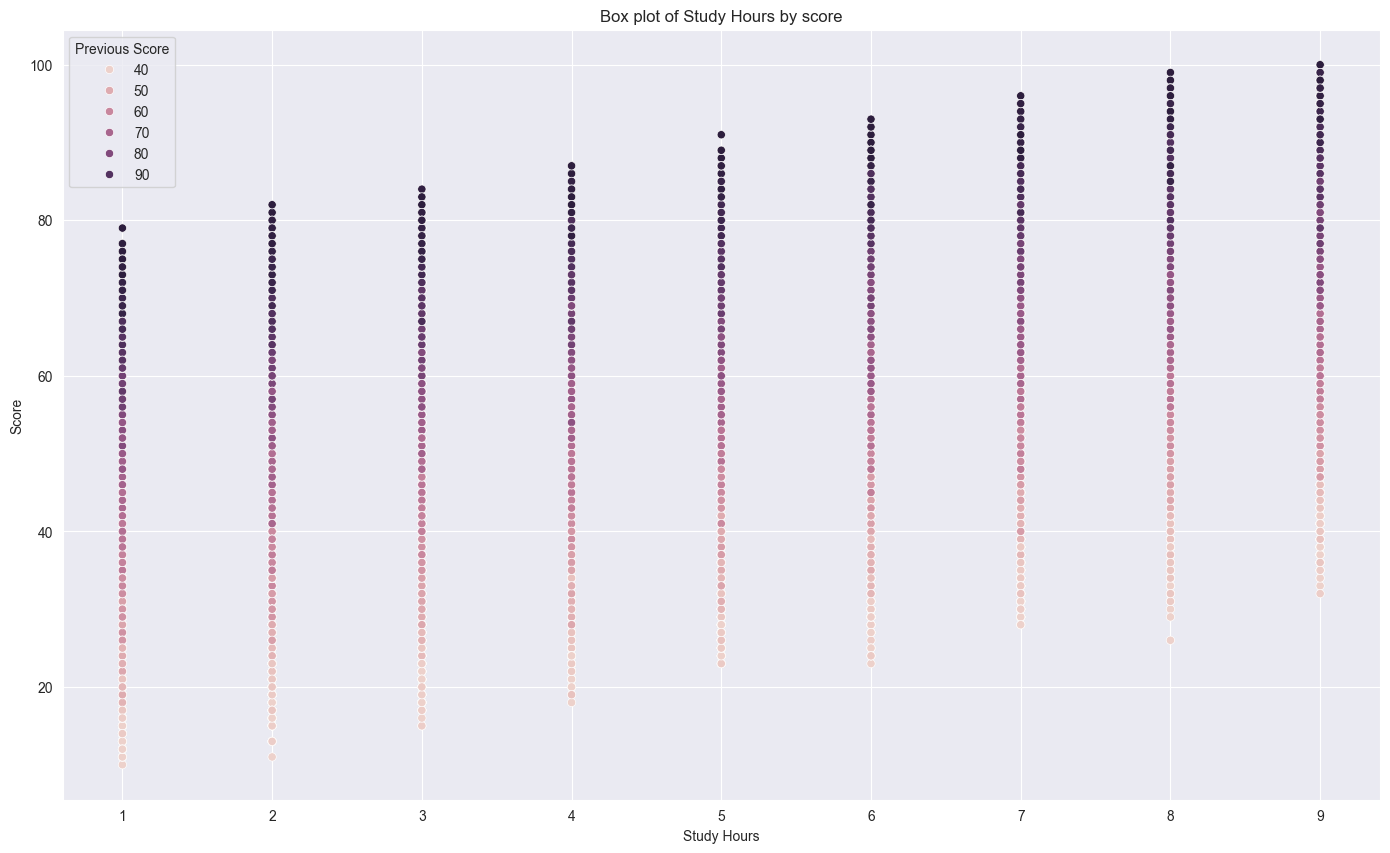

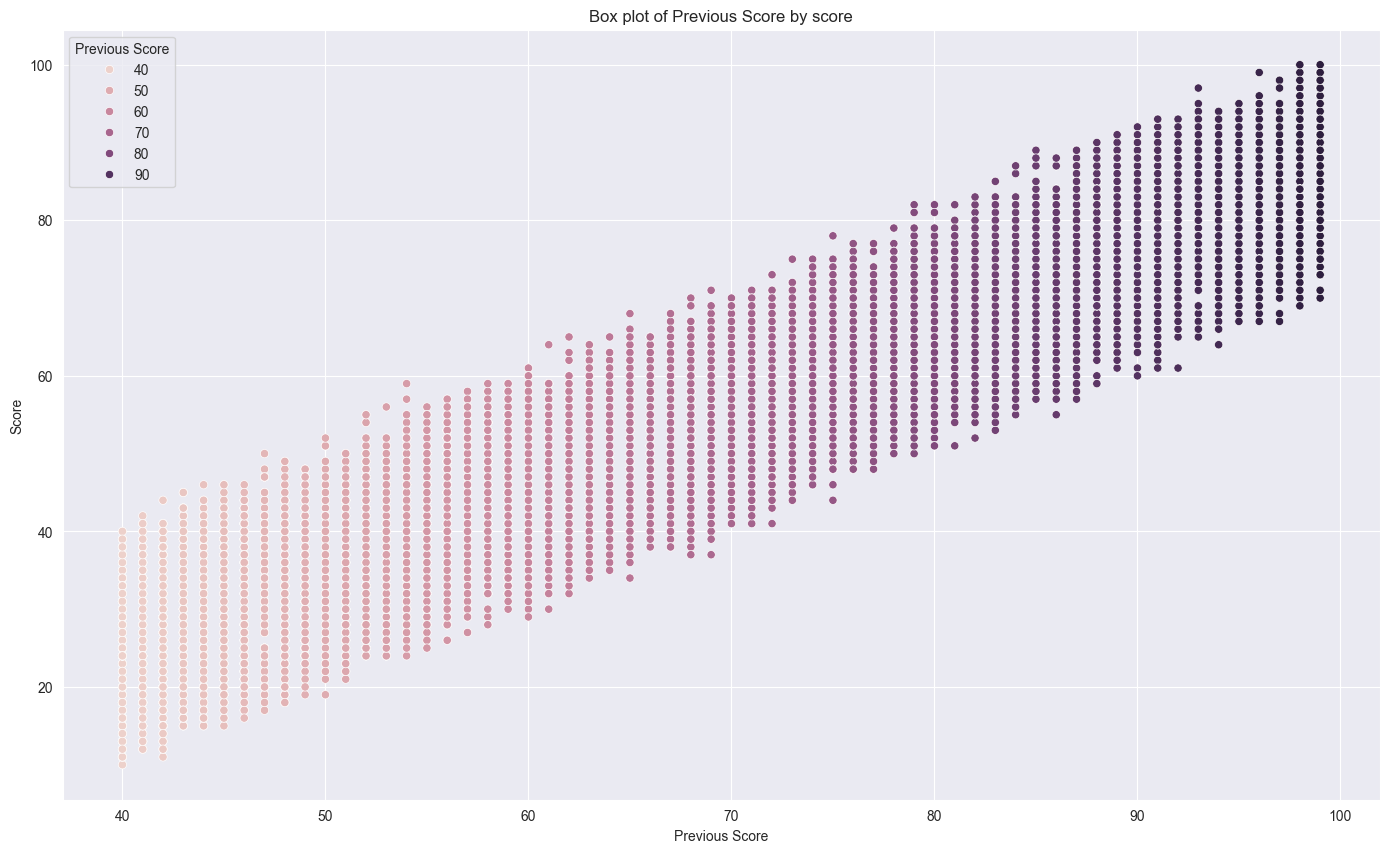

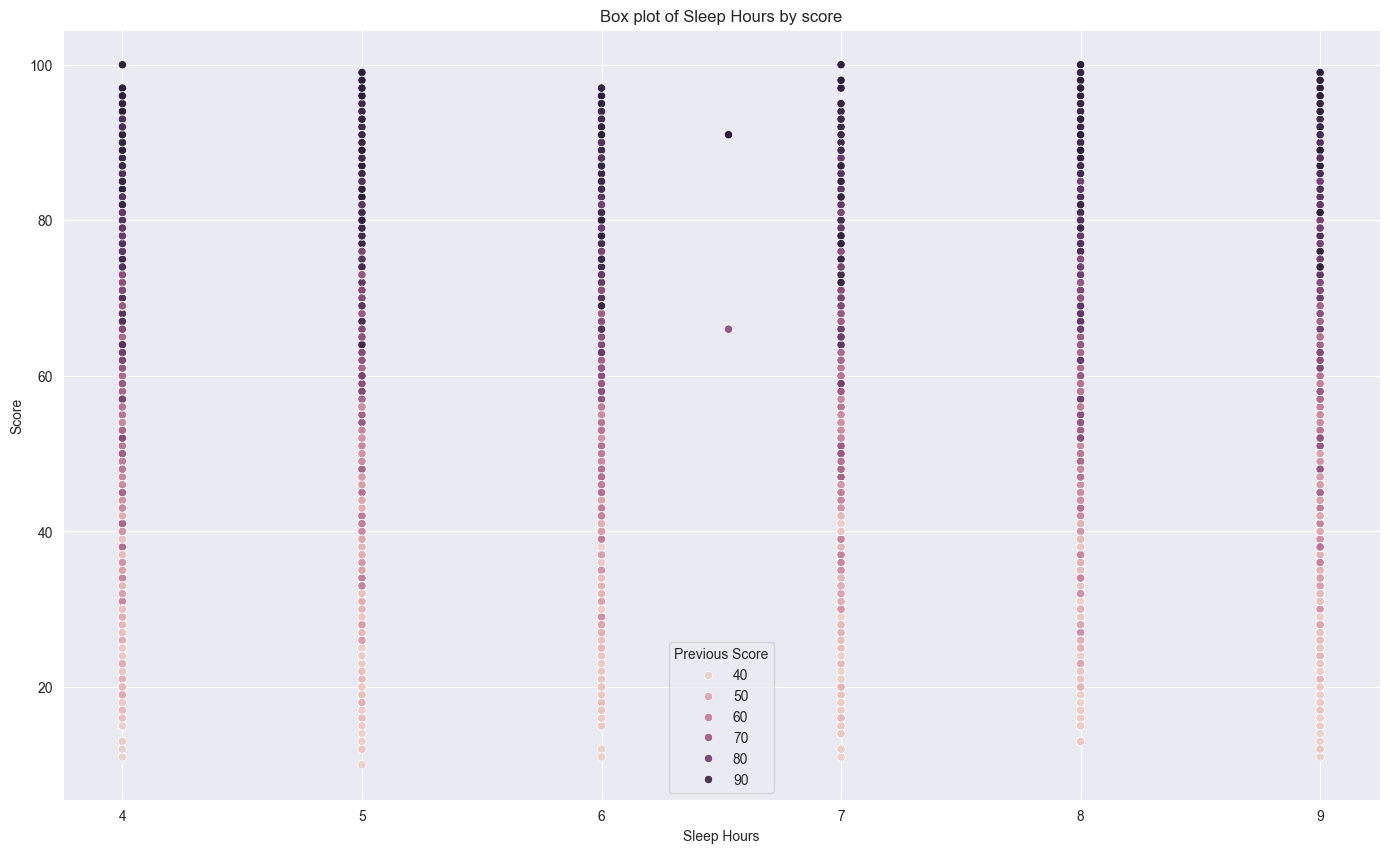

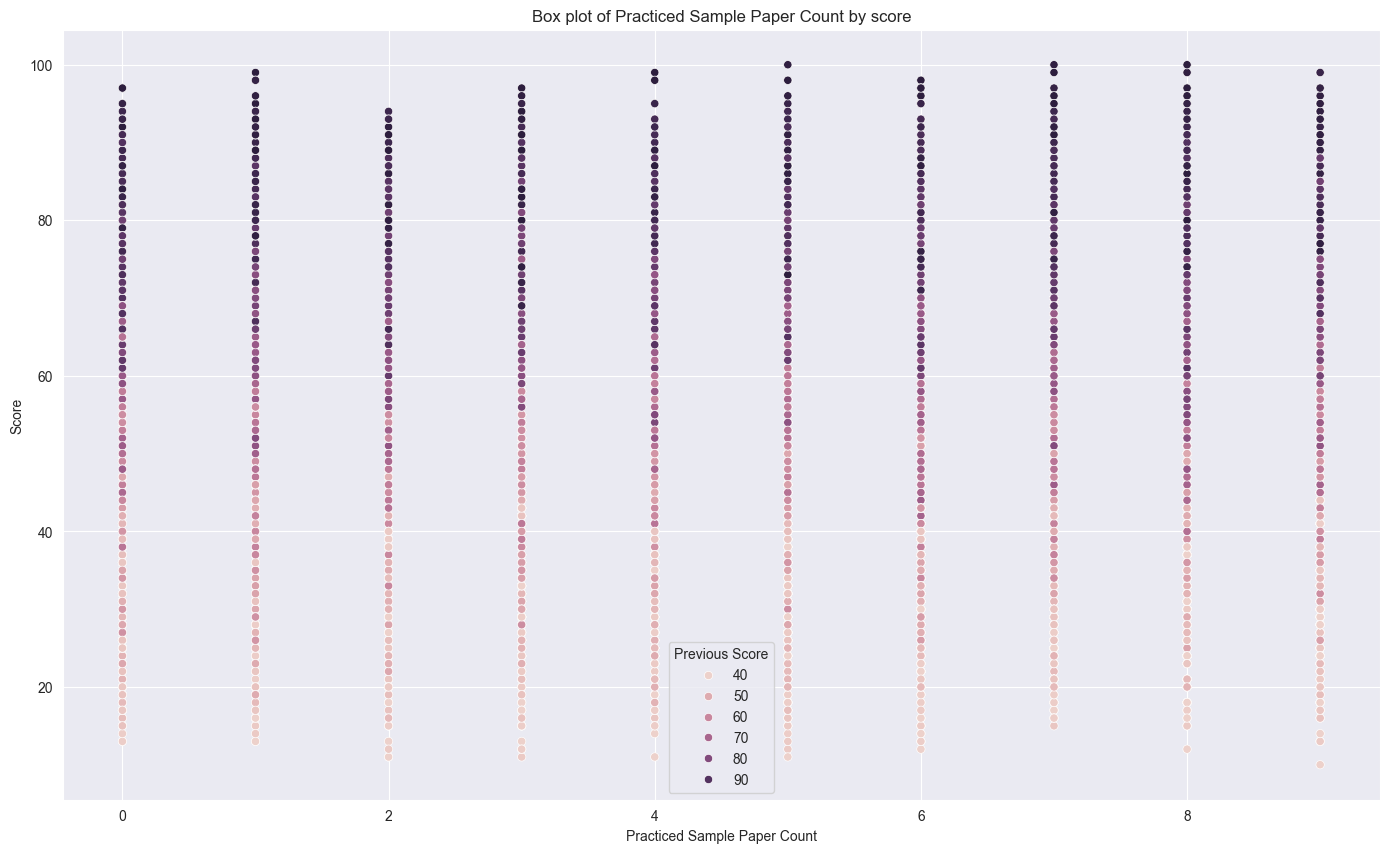

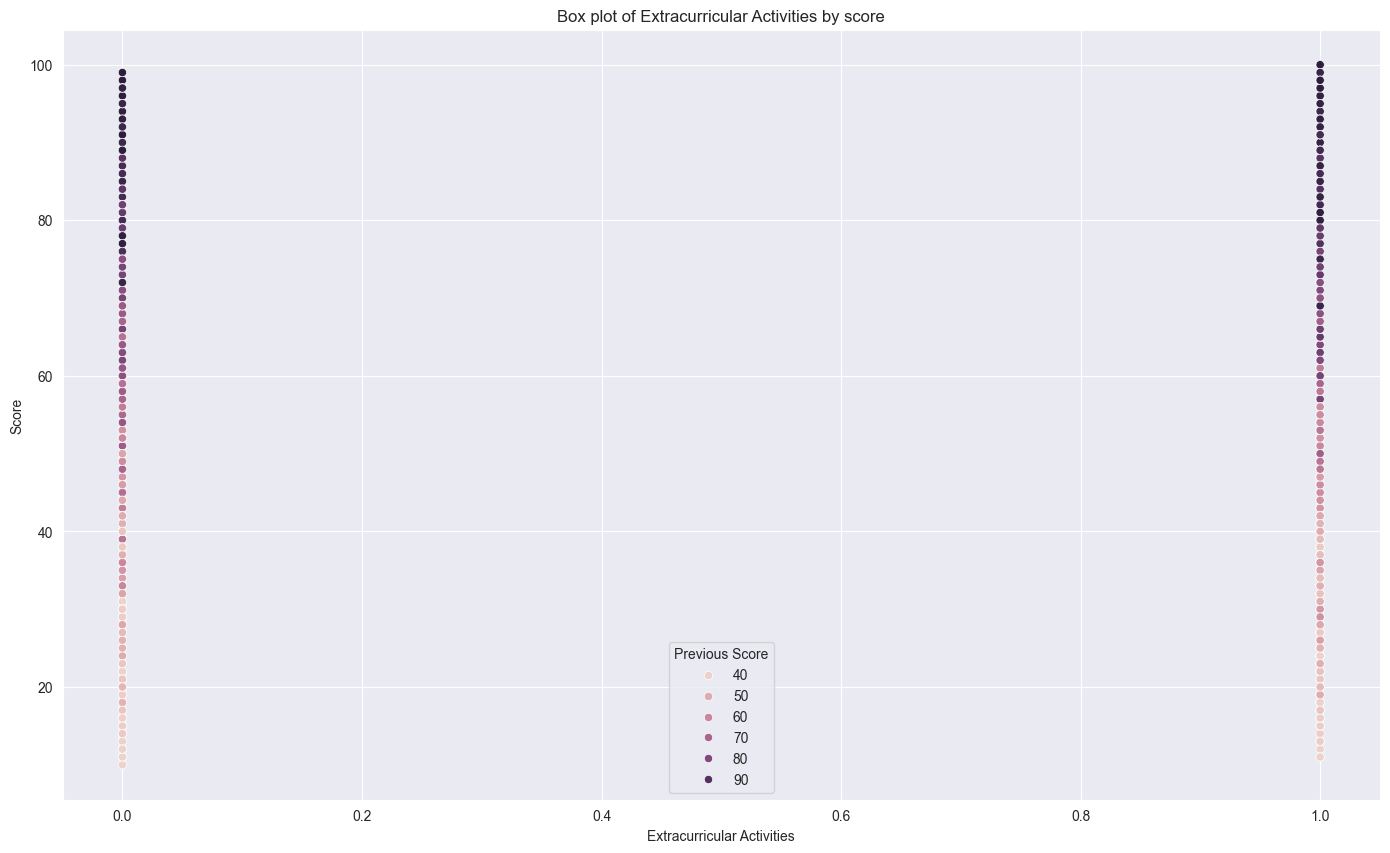

In [125]:
# Plotting scatter between features and targets
for columns in independent.columns:
    plt.figure(figsize=(17,10))
    sns.scatterplot(x = columns, y = dependent, data = new_data, hue = "Previous Score")
    plt.title(f'Box plot of {columns} by score')
    plt.xlabel(columns)
    plt.ylabel("Score")
    plt.show()

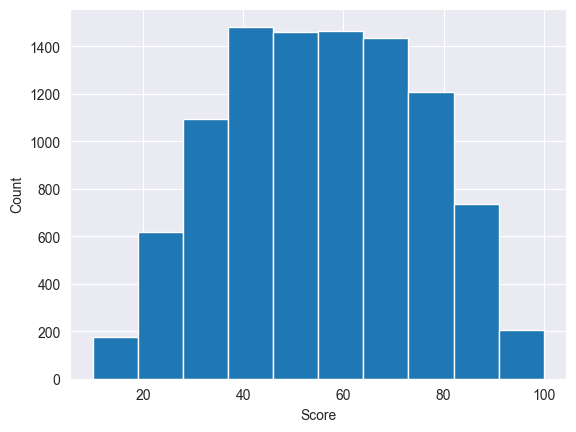

In [126]:
# Plotting score histogram for how many score count Scattered around data
plt.hist(dependent, bins=10)
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

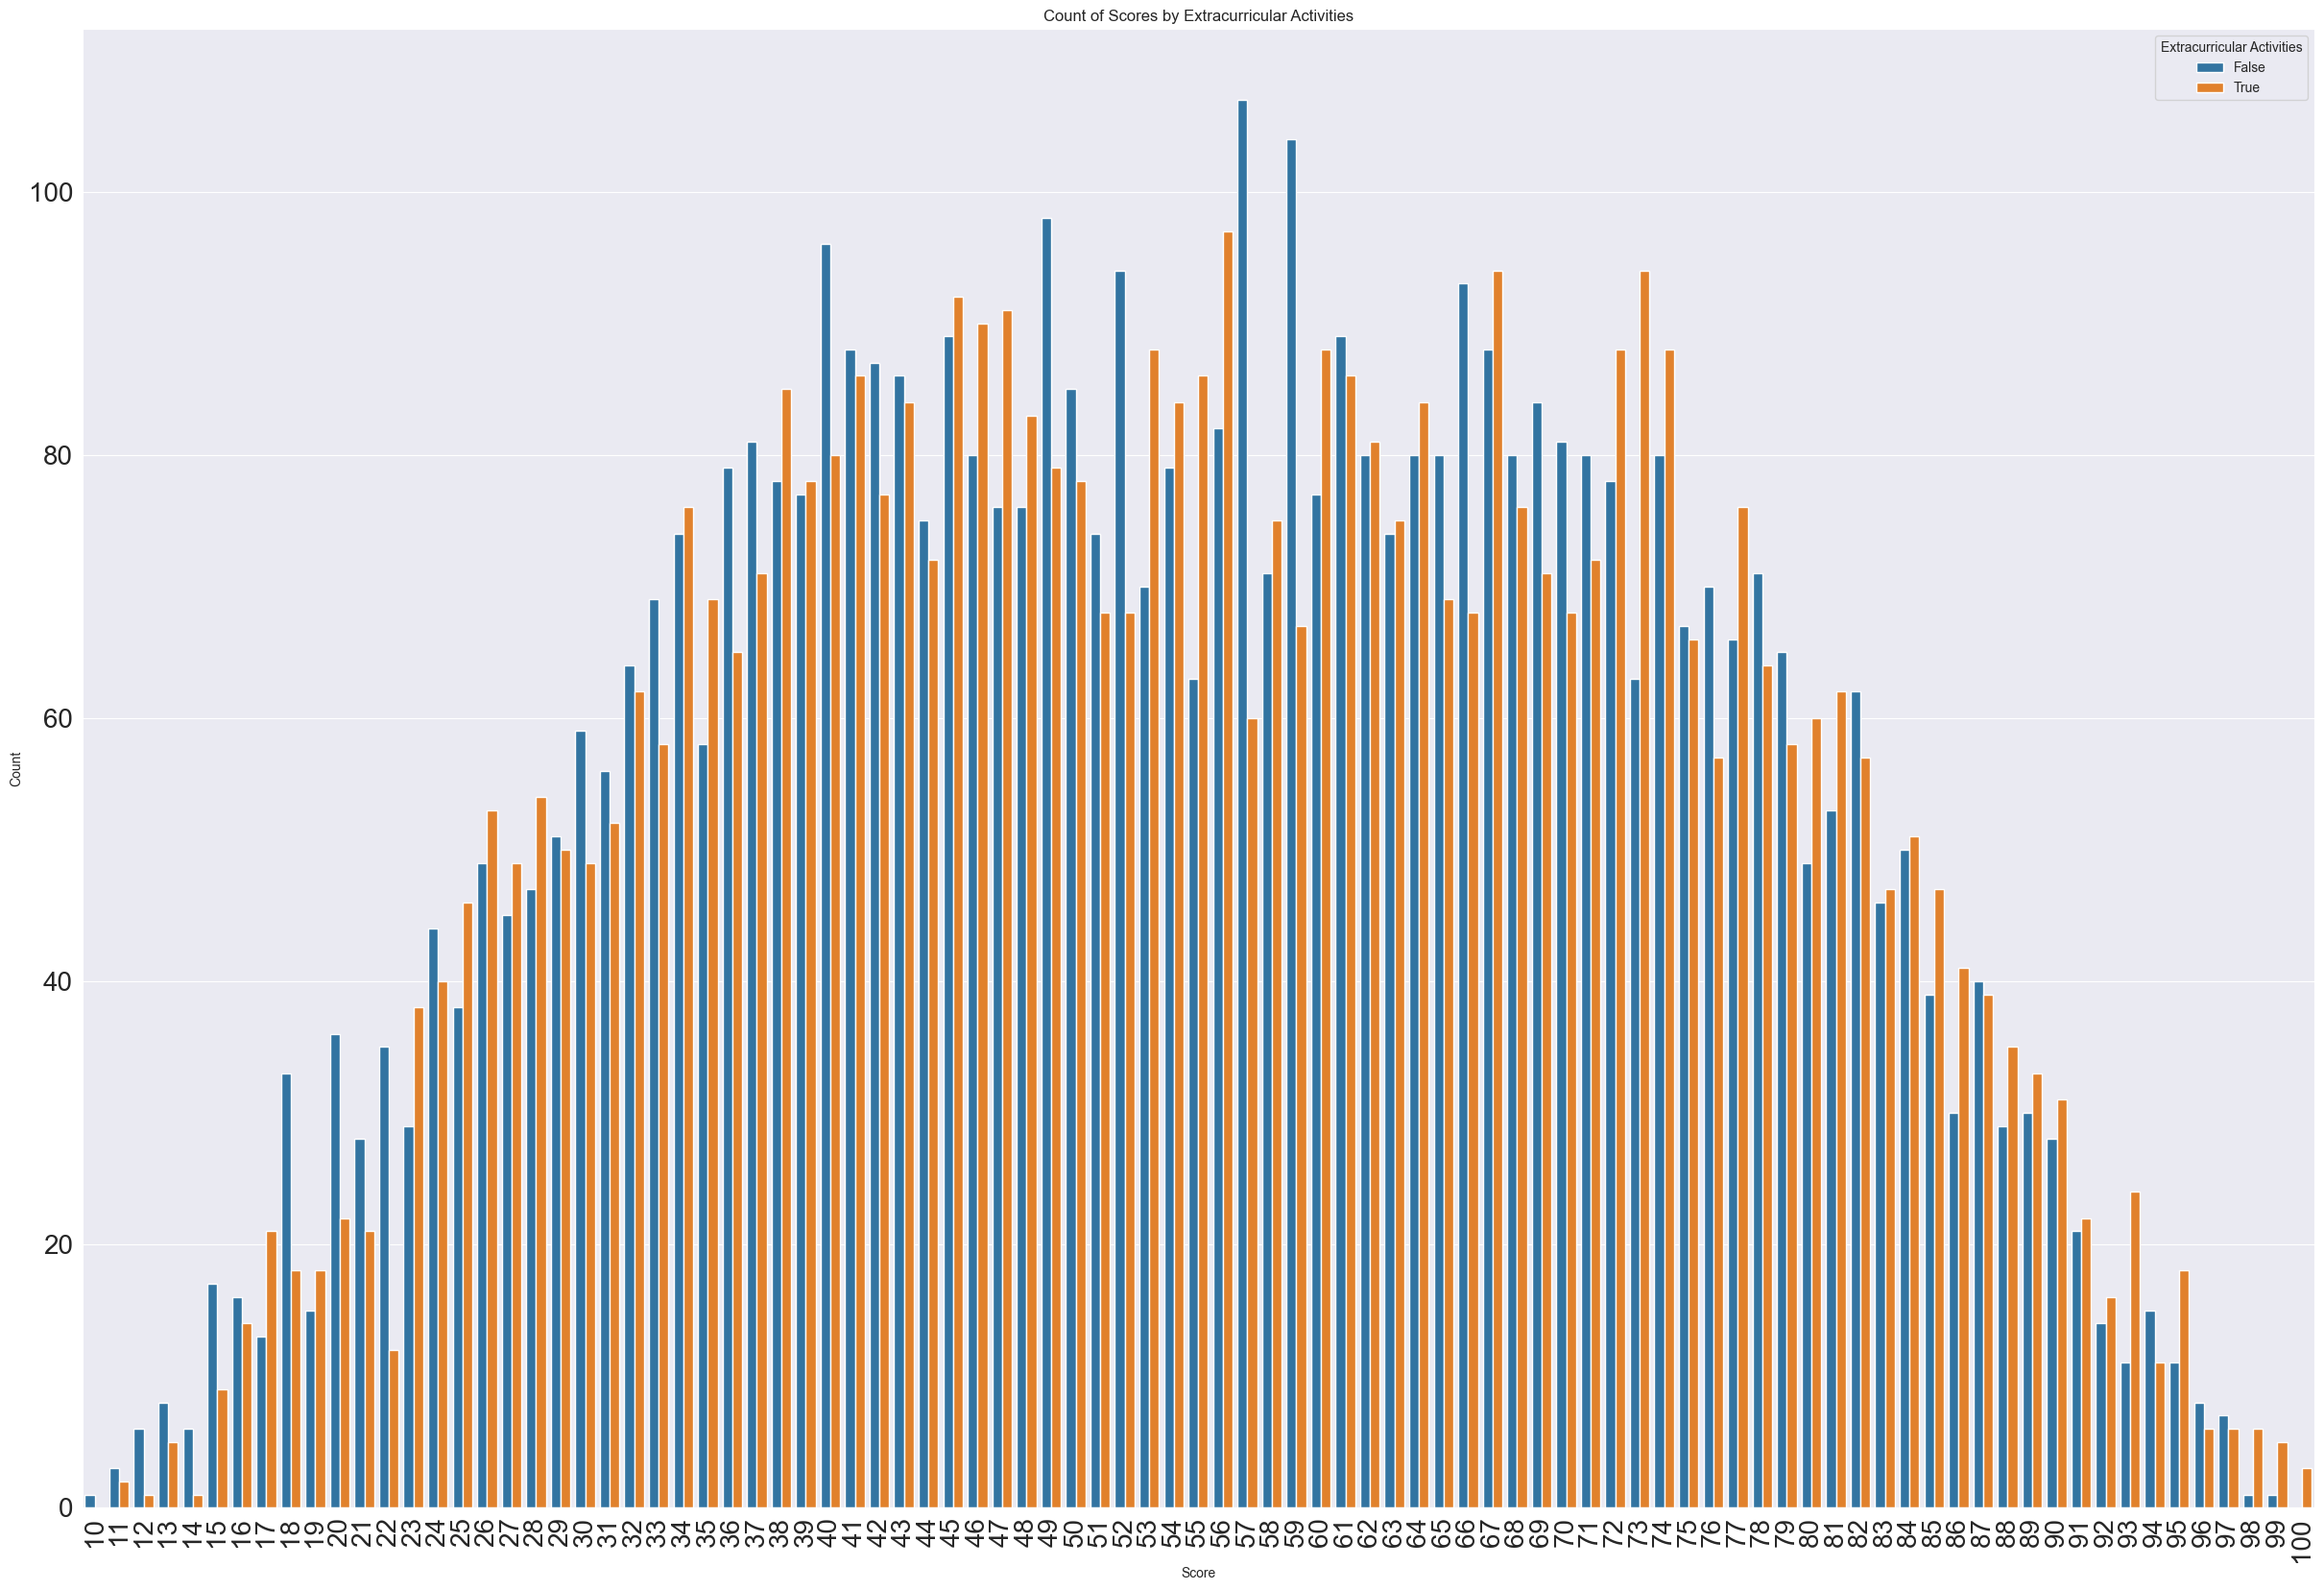

In [127]:
plt.figure(figsize=(30,20))
sns.countplot(x="Score", hue ="Extracurricular Activities", data=new_data)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Scores by Extracurricular Activities')
plt.xticks(rotation=90,  fontsize=20)
plt.yticks( fontsize=20)
plt.show()

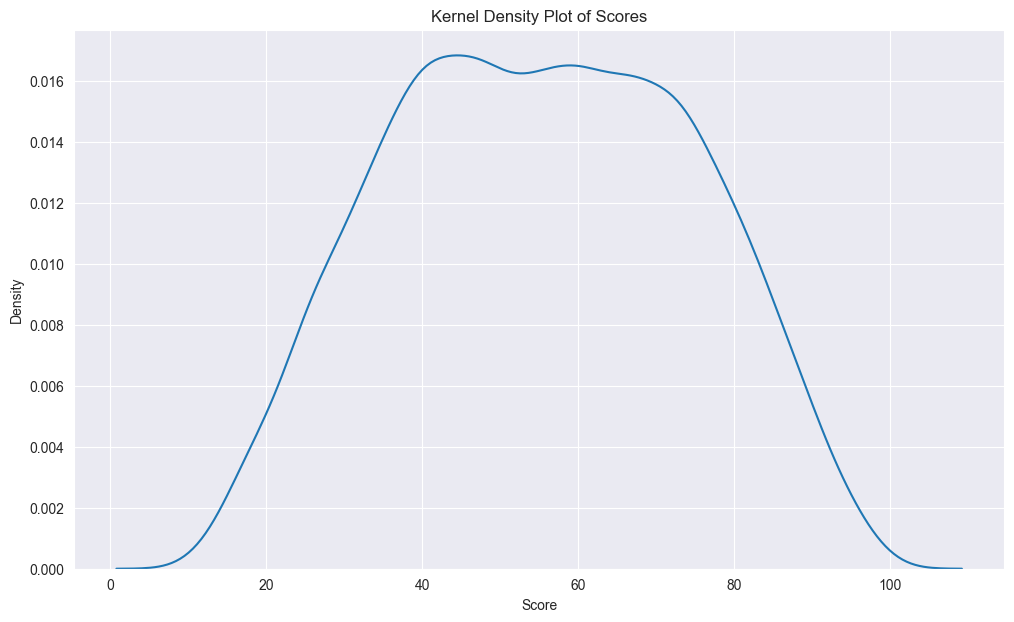

In [128]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=new_data, x='Score')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Scores')
plt.show()


## Split the Data into training and testing
##### training data for train model
##### testing data for test our model accuracy


In [129]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=0)

## Evaluate the Model

In [130]:
model = LinearRegression()

In [131]:
model.fit(x_train, y_train)

LinearRegression()

## Check model performance
##### We can use mean squared error, mean absolute error and R2 score for check performance
##### MSE measures the average of the squares of the errors—that is, the average squared difference between the actual and predicted values
##### Lower MSE values indicate a better fit. However, since MSE is in squared units of the response variable, it can be harder to interpret directly
##### R², or the coefficient of determination, indicates the proportion of the variance in the dependent variable that is predictable from the independent variable
##### R² ranges from 0 to 1. An R² of 1 indicates that the model perfectly explains the variability of the response data around its mean, while an R² of 0 indicates that the model does not explain any of the variability.
##### We can check these thing between trained and test data 

In [132]:
# Get predicted values for our trained data
y_pred_train = model.predict(x_train)

# Get predicted values for our test data
y_pred_test = model.predict(x_test)

In [133]:
# Evaluate metrics for trained and test data predictors
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [134]:
print(f"Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}")
print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training R-squared: {r2_train:.2f}, Testing R-squared: {r2_test:.2f}")

Training MAE: 1.61, Testing MAE: 1.69
Training MSE: 4.10, Testing MSE: 4.49
Training R-squared: 0.99, Testing R-squared: 0.99


#####  We can get good understand using below residual plot how model residuals are spread around plot

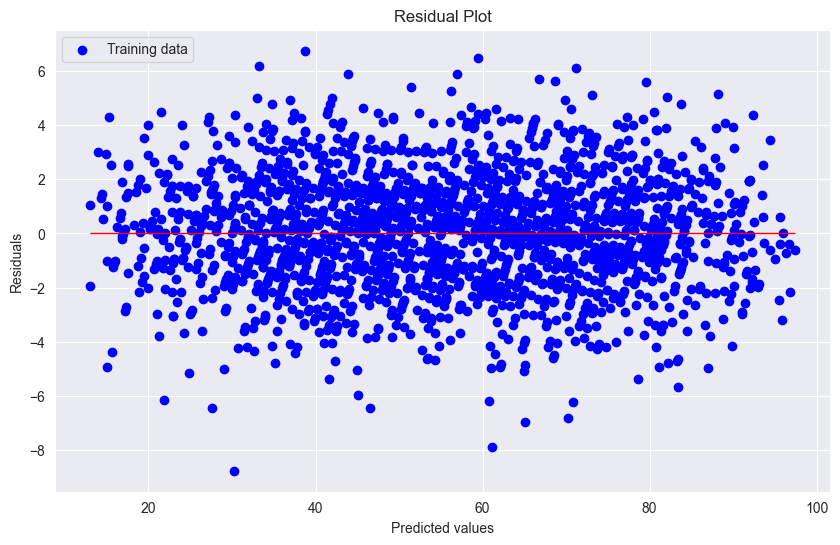

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, y_pred_test - y_test, c='blue', marker='o', label='Training data')
plt.hlines(y=0, xmin=np.min(y_pred_test), xmax=np.max(y_pred_test), colors='red', lw=1)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper left')
plt.show()

## Fine-tune the Model
##### We can use some different techniques for develop model performance
##### Feature Selection
##### Hyperparameter optimization
##### Regularization
##### Cross validation

### Feature Selection
##### Choose the most relevant features to include in the model

In [136]:
# We can use recursive feature elimination method 
RFE_CV = RFECV(estimator=model, min_features_to_select=1, cv=10)

In [137]:
results = RFE_CV.fit(independent, dependent)

In [138]:
results.support_

array([ True,  True,  True,  True,  True])

In [139]:
selected_columns = independent.columns[results.support_]

In [140]:
selected_columns

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')

### Regularization
##### Apply techniques to prevent overfitting by adding a penalty to the model's complexity
###### 1.Ridge Regression: Adds an L2 penalty to the loss function.
###### 2.Lasso Regression: Adds an L1 penalty to the loss function.
###### 3.Elastic Net: Combines both L1 and L2 penalties

### Hyperparameter optimization
##### Optimize hyperparameters to improve model performance.
###### 1.Grid search technique
###### 2.Random search technique

In [141]:
# let's see how find best parameter for lasso and ridge regression
parameters = {"alpha" : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [142]:
lasso_model = Lasso()

In [143]:
ridge_model = Ridge()

##### Grid search

In [144]:
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=parameters, cv = 10)
best_grid_param_lasso = grid_search_lasso.fit(independent, dependent)
print("Best parameters for Lasso (Grid search): ",best_grid_param_lasso.best_params_)

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=parameters, cv = 10)
best_grid_param_ridge = grid_search_ridge.fit(independent, dependent)
print("Best parameters for Lasso (Grid search): ",best_grid_param_ridge.best_params_)

Best parameters for Lasso (Grid search):  {'alpha': 0.001}
Best parameters for Lasso (Grid search):  {'alpha': 1}


##### Random search

In [145]:
random_search_lasso = RandomizedSearchCV(estimator=lasso_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_lasso = random_search_lasso.fit(independent, dependent)
print("Best parameters for Lasso (Random search): ", best_params_lasso.best_params_)

random_search_ridge = RandomizedSearchCV(estimator=ridge_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_ridge = random_search_ridge.fit(independent, dependent)
print("Best parameters for Ridge (Random search): ", best_params_ridge.best_params_)


Best parameters for Lasso (Random search):  {'alpha': 0.001}
Best parameters for Ridge (Random search):  {'alpha': 1}


### Regularization
#### Apply techniques to prevent overfitting by adding a penalty to the model's complexity
##### 1.Ridge Regression: Adds an L2 penalty to the loss function.
##### 2.Lasso Regression: Adds an L1 penalty to the loss function.
##### 3.Elastic Net: Combines both L1 and L2 penalties

In [146]:
# We got alpha using hyperparameter optimization technique
lasso = Lasso(alpha = 0.001)

In [147]:
ridge = Ridge(alpha = 1)

In [148]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [149]:
ridge.fit(x_train, y_train)

Ridge(alpha=1)

In [150]:
y_pred_ridge = ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge:.2f}")

Ridge Regression Mean Squared Error: 4.49


In [151]:
y_pred_lasso = lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso:.2f}")

Lasso Regression Mean Squared Error: 4.49


### Cross validation
##### Evaluate the model's performance using different subsets of the data to ensure it generalizes well.


In [152]:
scores_1 = cross_val_score(model, independent, dependent,  cv= 5 , scoring='neg_mean_squared_error')

# Negative mean squared error (MSE) is used for scoring; convert to positive
mse_scores = -scores_1

# Print cross-validation results
print("Cross-Validation Scores (MSE):", mse_scores)
print("Average Cross-Validation MSE:", mse_scores.mean())

Cross-Validation Scores (MSE): [4.19954754 4.17890463 3.97853574 4.22917841 4.31036621]
Average Cross-Validation MSE: 4.179306504798317


In [153]:
scores_1 = cross_val_score(ridge, independent, dependent,  cv= 5 , scoring='neg_mean_squared_error')

# Negative mean squared error (MSE) is used for scoring; convert to positive
mse_scores = -scores_1

# Print cross-validation results
print("Cross-Validation Scores (MSE):", mse_scores)
print("Average Cross-Validation MSE:", mse_scores.mean())

Cross-Validation Scores (MSE): [4.1995414  4.17892287 3.97854204 4.22916608 4.31035952]
Average Cross-Validation MSE: 4.179306381832535


In [154]:
scores_lasso = cross_val_score(lasso, independent, dependent,  cv= 5 , scoring='neg_mean_squared_error')

# Negative mean squared error (MSE) is used for scoring; convert to positive
mse_scores = -scores_1

# Print cross-validation results
print("Cross-Validation Scores (MSE):", mse_scores)
print("Average Cross-Validation MSE:", mse_scores.mean())

Cross-Validation Scores (MSE): [4.1995414  4.17892287 3.97854204 4.22916608 4.31035952]
Average Cross-Validation MSE: 4.179306381832535


##### We can become predictions using these examples
###### MSE: The average squared difference between the predicted and actual values is 10.0.
###### RMSE: The average difference between the predicted and actual values is approximately 3.16 units, which can be considered good or bad depending on the scale of the target variable.
###### R²: 85% of the variance in the target variable is explained by the model, indicating a strong fit.


## Now our model is ready for make predictions

In [155]:
independent.columns

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')

In [156]:
new_student_sample_data = np.array([6, 56, 7, 6, True]).reshape(1, 5)

In [ ]:
prediction = model.predict(new_student_sample_data)
prediction_lasso = lasso.predict(new_student_sample_data)
prediction_ridge = ridge.predict(new_student_sample_data)

In [162]:
print("Student score :",prediction)
print("Student score :",prediction_lasso)
print("Student score :",prediction_ridge)

Student score : [45.24303792]
Student score : [45.24055433]
Student score : [45.24281787]
